In [153]:
import urllib
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import shutil
import os
import time
    
def init_driver():
    chrome_options = webdriver.ChromeOptions()
    ua = "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36"
    chrome_options.add_argument("user-agent={}".format(ua))
    driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options=chrome_options)
    return driver

def check_image_same_row(np_img):
    x = np_img.shape[0]//3 # 100
    r = x
    status = 0
    true = 0
    for i in range(0,2):
        r1_under = np_img[r-1:r,0:x] # 下行
        r2_above = np_img[r:r+1,0:x] # 上行
        r1_under_sum = sum(r1_under[0])
        r2_above_sum = sum(r2_above[0])
        np_pixel_diff = abs(r1_under_sum - r2_above_sum)
        print("----->", np_pixel_diff, r1_under_sum, r2_above_sum)
        if np_pixel_diff < 800:
            true += 1
        r += x
    
    if true == 2:
        status = 1
    return status

def download_image(url, name="train"):
    urllib.request.urlretrieve(url, "data/images/" + name + ".jpg")

def move_image(name="train", status=0):
    if status == 0:
        file = "3x3/"
    elif status == 1:
        file = "4x4/"
    else:
        file = ""
    path = "data/images/" + file + name +"/"
    
    if not os.path.isdir(path):
        os.mkdir(path)
    list_os_file = os.listdir(path)
    if len(list_os_file) == 0:
        number = 1
    else:
        number = len(list_os_file) + 1

    oldpath = "data/images/" + "train.jpg"
    newpath = path + str(number) + ".jpg" 
    shutil.copyfile(oldpath, newpath)
    

In [155]:
url = "https://www.google.com/search?q="
query_key = "123"
driver = init_driver()
driver.get("https://www.google.com/search?q=allintitle%3A+water%20ionizer%20system%20company")
time.sleep(0.1)
xf = driver.find_element_by_xpath("/html/body/div[1]/form/div/div/div/iframe")
driver.switch_to.frame(xf)
driver_iframe = driver.find_element_by_xpath('/html/body/div[2]/div[3]/div[1]/div/div/span/div[1]')
driver_iframe.click()
time.sleep(0.1)
driver.switch_to.default_content()
xf2 =driver.find_element_by_xpath('/html/body/div[2]/div[4]/iframe')
driver.switch_to.frame(xf2)



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\top\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  app.launch_new_instance()
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if sys.pa

In [158]:
for i in range(0,100): 
    driver_if2 = driver.find_element_by_xpath("/html/body/div/div/div[2]/div[1]/div[1]/div/strong")
    label = driver_if2.text
    url = driver_if2.find_element_by_xpath('/html/body/div/div/div[2]/div[2]/div/table/tbody/tr[1]/td[2]/div/div[1]/img').get_attribute('src')

    download_image(url)
    img = cv2.imread('data/images/train.jpg', cv2.IMREAD_GRAYSCALE)
    status = check_image_same_row(img)
    move_image(label, status)

    driver.find_element_by_xpath("/html/body/div/div/div[3]/div[2]/div[1]/div[1]/div[1]/button").click()

C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
C:\python3_27\envs\seo_env\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


-----> 5386 18500 13114
-----> 7819 15404 7585
-----> 5386 18500 13114
-----> 7819 15404 7585
-----> 1006 11766 12772
-----> 4931 4721 9652
-----> 1883 10531 12414
-----> 1687 8931 7244
-----> 2837 14415 11578
-----> 3087 14735 17822
-----> 8033 7132 15165
-----> 1816 9713 7897
-----> 8474 9355 17829
-----> 7134 9490 16624
-----> 4599 10296 5697
-----> 6991 9703 16694
-----> 7328 10647 17975
-----> 947 15162 16109
-----> 6672 16198 9526
-----> 2869 10071 12940
-----> 10014 9768 19782
-----> 7261 5321 12582
-----> 3821 11335 15156
-----> 9155 11218 20373
-----> 2728 13605 16333
-----> 224 15336 15112
-----> 3941 14990 18931
-----> 5402 9733 4331
-----> 822 8012 8834
-----> 7016 18650 11634
-----> 1782 12917 11135
-----> 11823 3783 15606
-----> 6058 10252 16310
-----> 1028 6221 7249
-----> 5566 11206 16772
-----> 8350 10353 18703
-----> 5796 14350 20146
-----> 13545 19144 5599
-----> 12266 10181 22447
-----> 6491 15133 8642
-----> 8210 9926 18136
-----> 6227 10799 17026
-----> 8797 6166 

## 圖片分析

In [4]:
import cv2
import matplotlib.pyplot as plt

In [10]:
# , cv2.IMREAD_GRAYSCALE
img = cv2.imread('data/images/test.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('data/images/test2.jpg', cv2.IMREAD_GRAYSCALE)

((300, 300), <matplotlib.image.AxesImage at 0x1985a353108>)

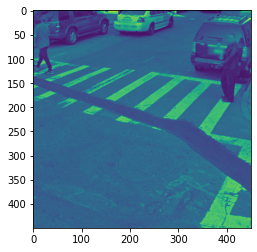

In [15]:
img.shape, plt.imshow(img2)

In [12]:
x = img.shape[0]//3

In [78]:
def check_image_same_row(np_img):
    x = np_img.shape[0]//3 # 100
    r = x
    status = 0
    true = 0
    for i in range(0,2):
        r1_under = np_img[r-1:r,0:x] # 下行
        r2_above = np_img[r:r+1,0:x] # 上行
        r1_under_sum = sum(r1_under[0])
        r2_above_sum = sum(r2_above[0])
        np_pixel_diff = abs(r1_under_sum - r2_above_sum)
        # print("----->", np_pixel_diff, r1_under_sum, r2_above_sum)
        if np_pixel_diff < 200:
            true += 1
        r += x
    
    if true == 2:
        status = 1
    return status
      
def split_image():
    pass


In [79]:
check_image_same_row(img)

0

In [80]:
check_image_same_row(img2)

1

## 下載圖片並且分類